Exploración de Datos: Predicción de éxito para Startups
En este notebook, exploraremos los datos de startups.csv un dataset que reúne información de aproximadamente 923 startups de EE.UU. (empresas tecnológicas de diversas industrias) fundadas entre ~2005 y 2013, incluyendo características variadas sobre cada startup​

In [1]:
# Notebook: 01_eda.ipynb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from pathlib import Path

# Añadir directorio raíz al path para poder importar desde src
sys.path.append(str(Path().resolve().parent))

from src.config import RAW_DATA_DIR, PROCESSED_DATA_DIR, TARGET_COLUMN, RAW_DATA_FILE

# Cargar el dataset
df = pd.read_csv(RAW_DATA_FILE)

# Exploración inicial
print("Primeras 5 filas del dataset:")
df.head()

Primeras 5 filas del dataset:


,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,c:65806,1,1,0,0,0,0,1.0000,1,closed


In [2]:
# Información general del dataset
print("Información del dataset:")
df.info()

# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
df.describe()

#Verificar valores nulos
print("\nValores nulos por columna:")
null_counts = df.isnull().sum()
print(null_counts[null_counts > 0])

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                923 non-null    int64  
 1   state_code                923 non-null    object 
 2   latitude                  923 non-null    float64
 3   longitude                 923 non-null    float64
 4   zip_code                  923 non-null    object 
 5   id                        923 non-null    object 
 6   city                      923 non-null    object 
 7   Unnamed: 6                430 non-null    object 
 8   name                      923 non-null    object 
 9   labels                    923 non-null    int64  
 10  founded_at                923 non-null    object 
 11  closed_at                 335 non-null    object 
 12  first_funding_at          923 non-null    object 
 13  last_funding_at           923 non-null  


Distribución de la variable objetivo:
status
acquired    597
closed      326
Name: count, dtype: int64


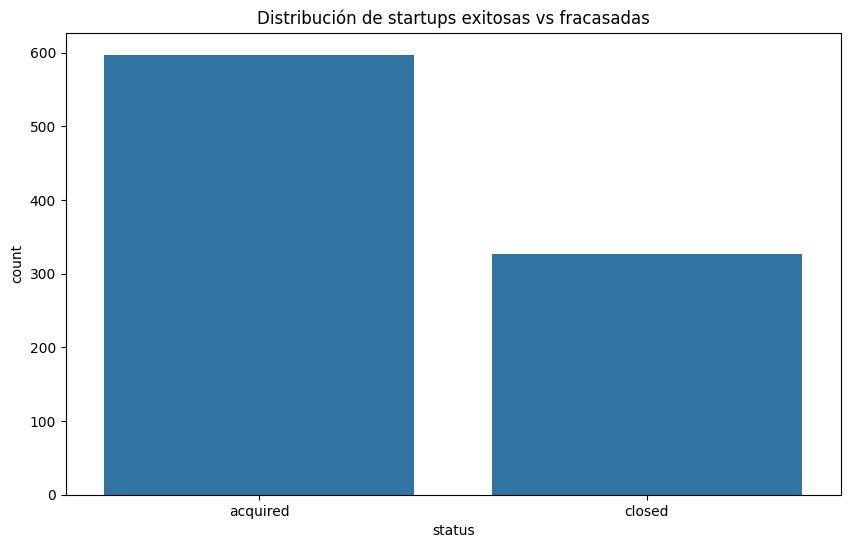

In [3]:
#Análisis de la variable objetivo
print("\nDistribución de la variable objetivo:")
target_counts = df[TARGET_COLUMN].value_counts()
print(target_counts)
plt.figure(figsize=(10, 6))
sns.countplot(x=TARGET_COLUMN, data=df)
plt.title('Distribución de startups exitosas vs fracasadas')
plt.savefig('../reports/figures/eda/target_distribution.png')
plt.show()

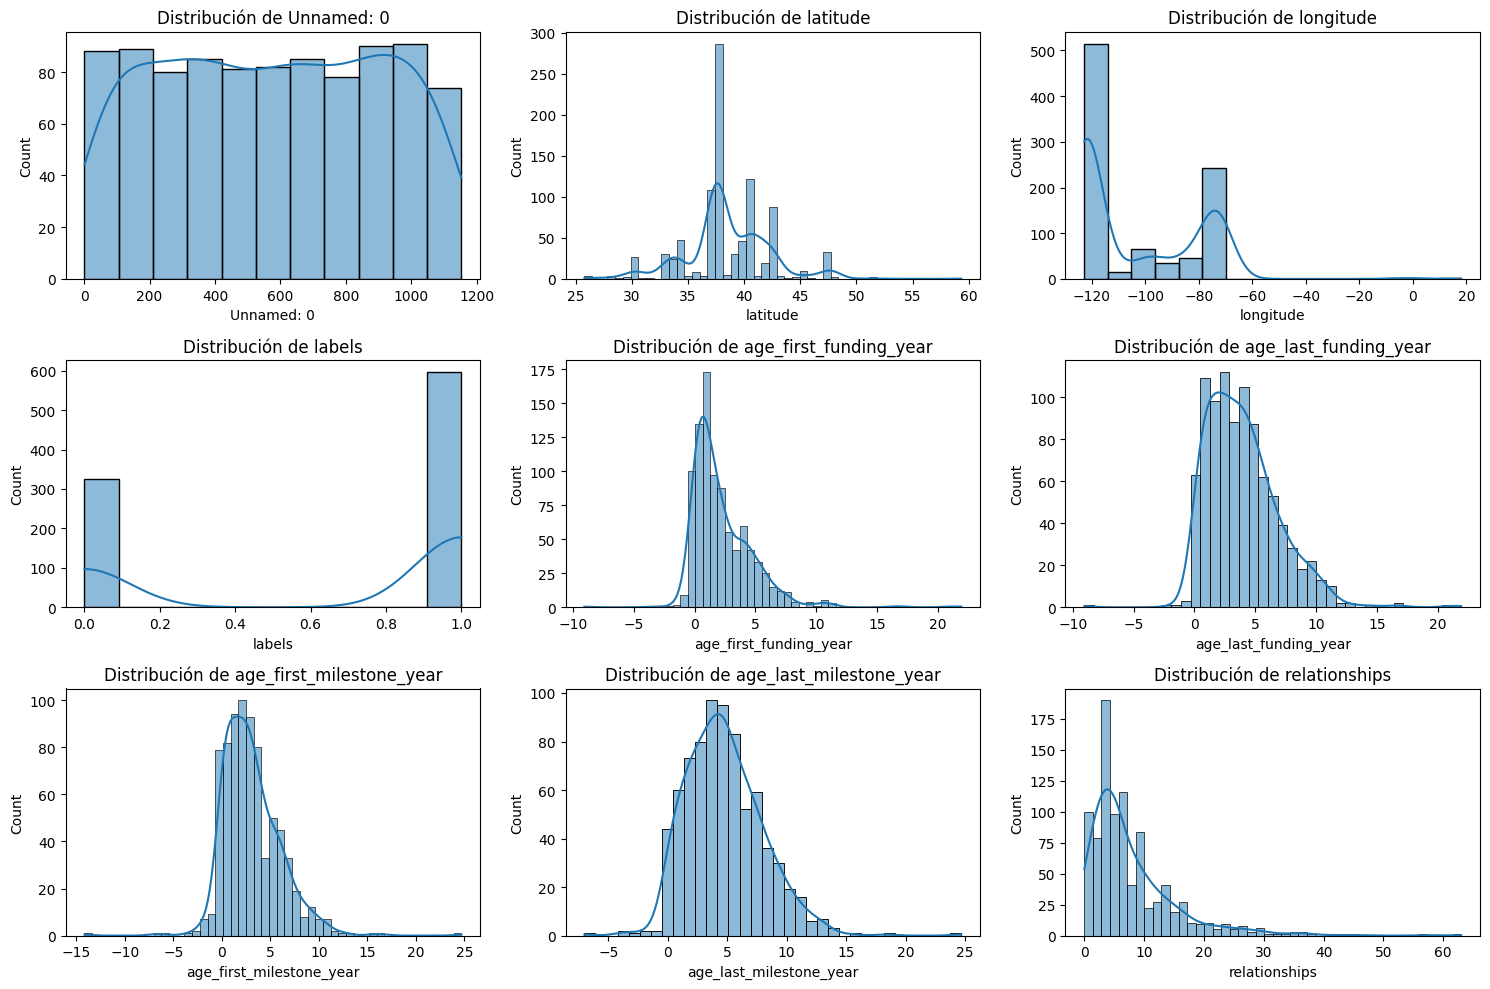

In [4]:
#Análisis de variables numéricas
numeric_columns = df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns[:9], 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribución de {column}')
plt.tight_layout()
plt.savefig('../reports/figures/eda/numeric_distributions.png')
plt.show()

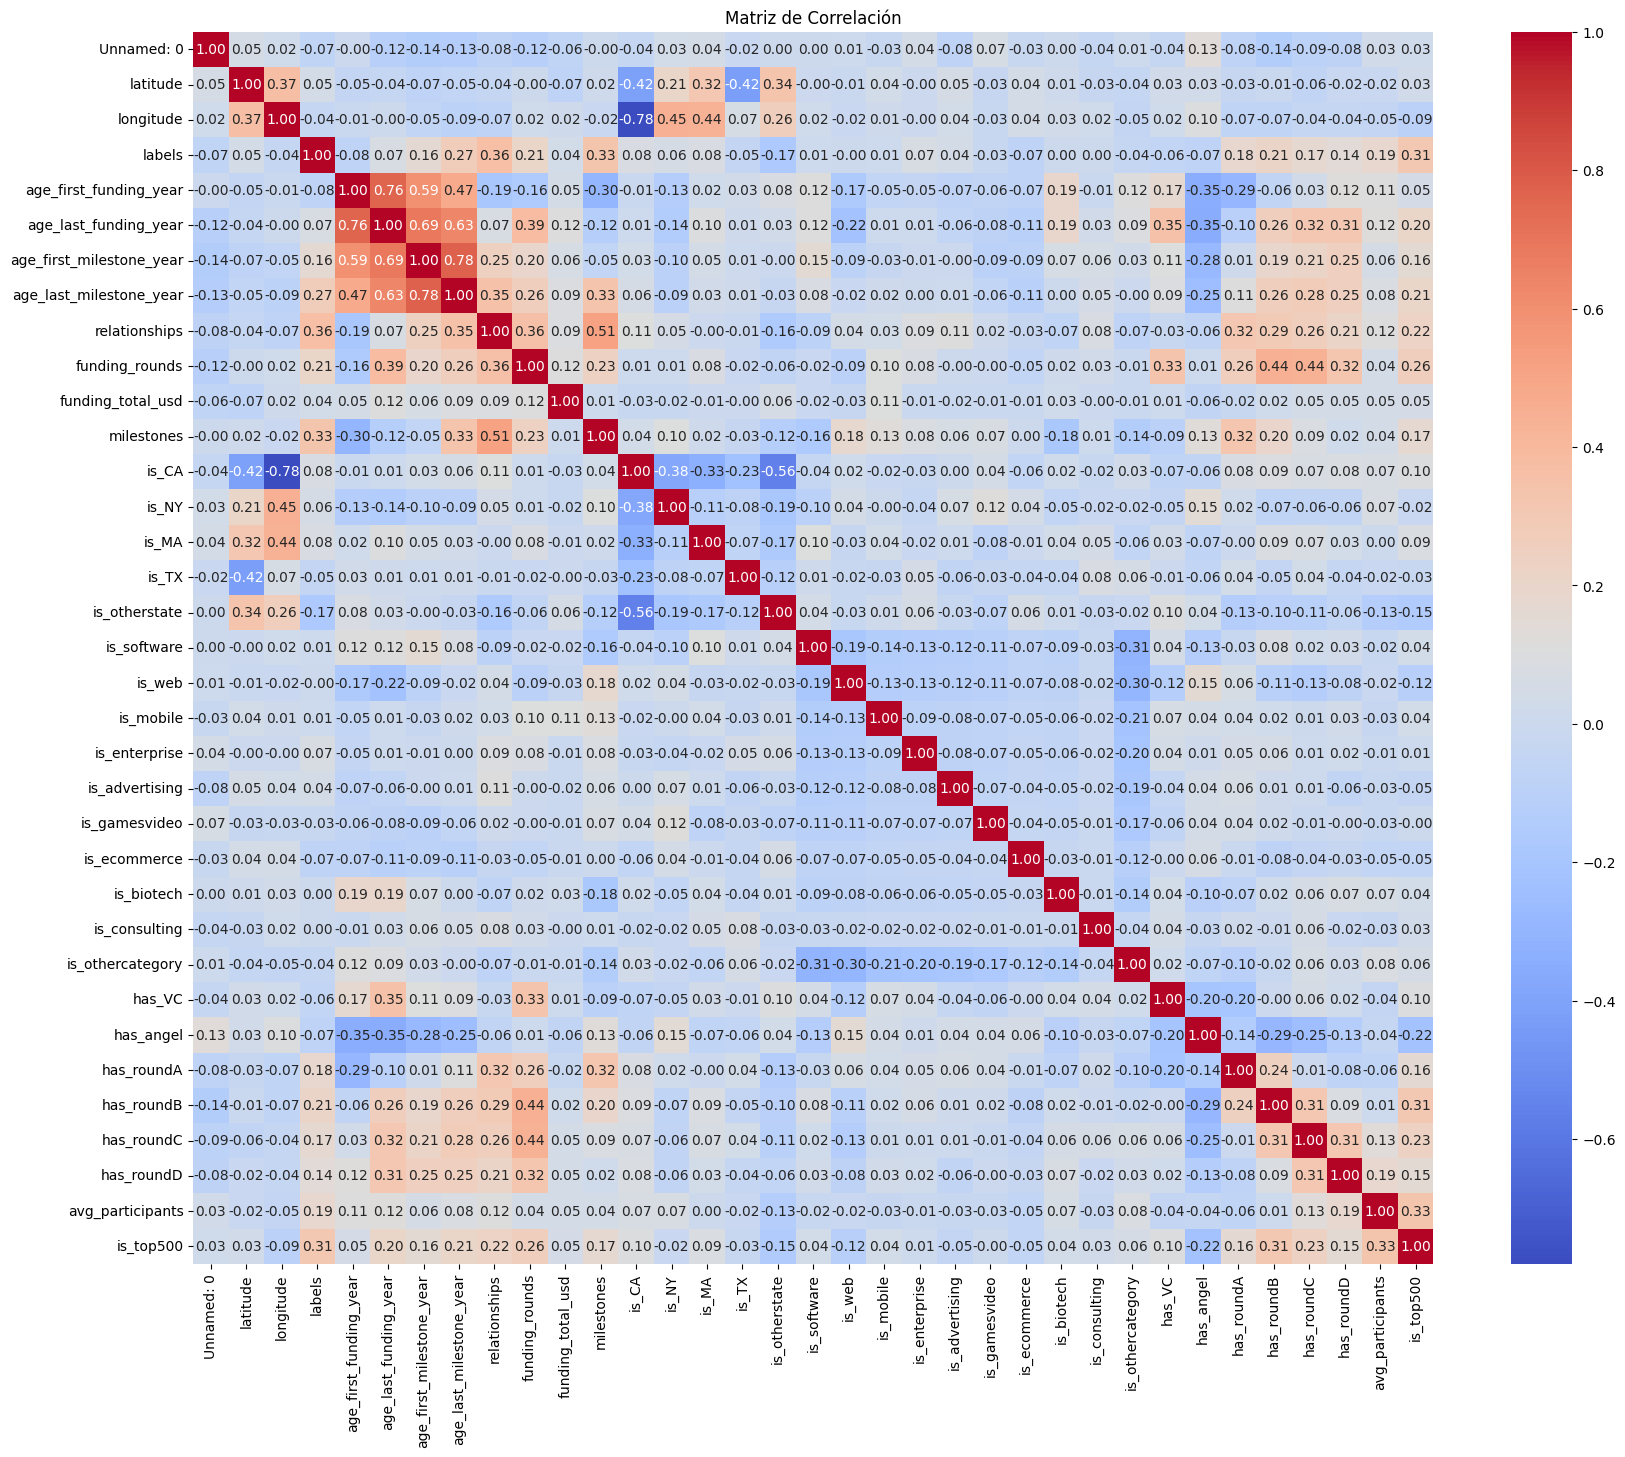

In [5]:
#Análisis de correlaciones
plt.figure(figsize=(20, 16))
correlation_matrix = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.savefig('../reports/figures/eda/correlation_matrix.png')
plt.show()

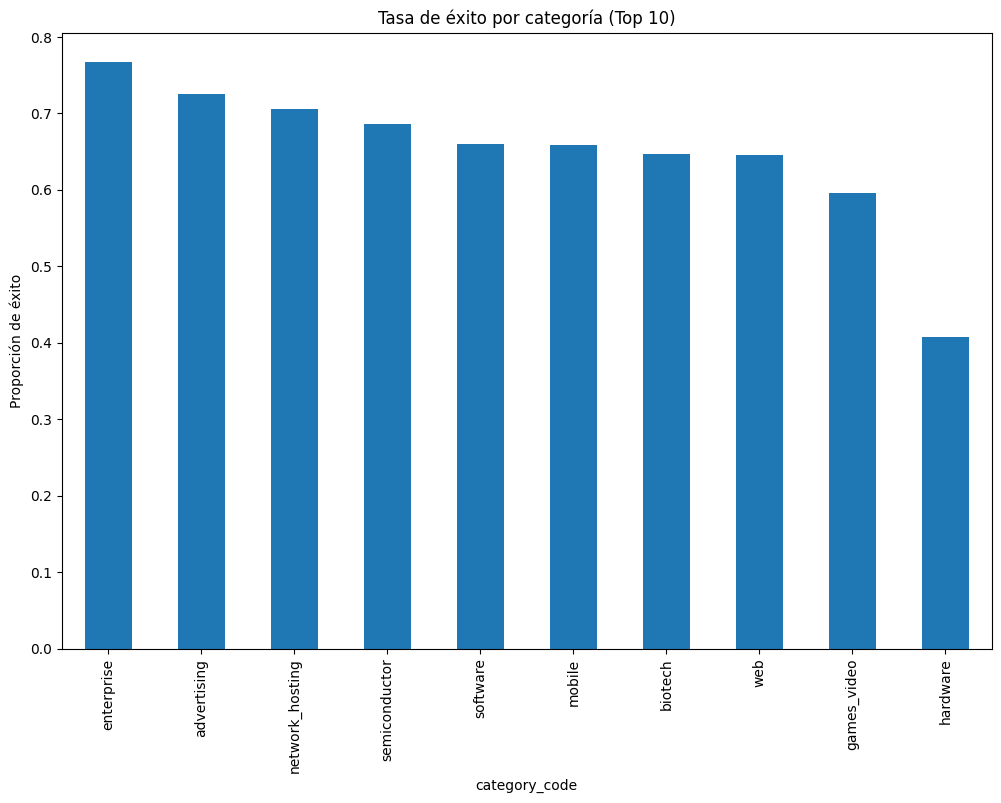

In [6]:
# Análisis por categorías/sectores
if 'category_code' in df.columns:
    plt.figure(figsize=(12, 8))
    top_categories = df['category_code'].value_counts().head(10).index
    category_success = df[df['category_code'].isin(top_categories)].groupby(['category_code', TARGET_COLUMN]).size().unstack()
    category_success_rate = category_success.div(category_success.sum(axis=1), axis=0)
    category_success_rate['acquired'].sort_values(ascending=False).plot(kind='bar')
    plt.title('Tasa de éxito por categoría (Top 10)')
    plt.ylabel('Proporción de éxito')
    plt.savefig('../reports/figures/eda/success_by_category.png')
    plt.show()

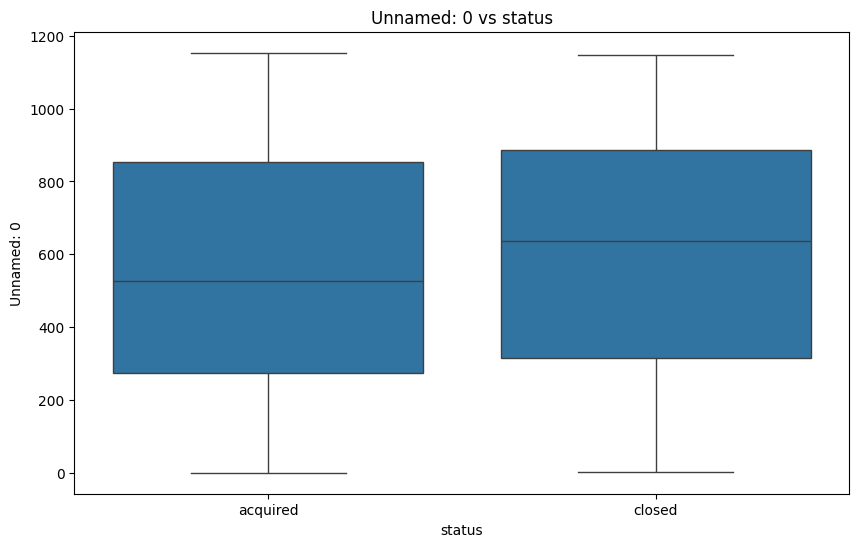

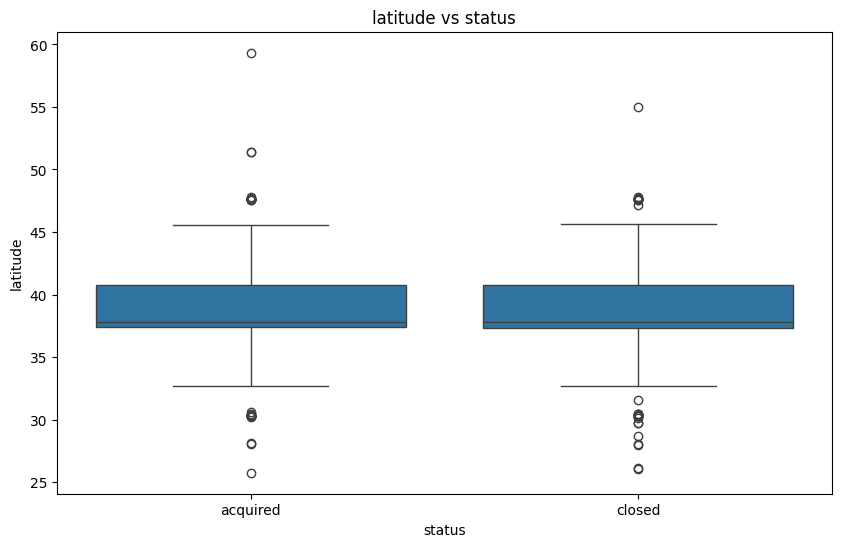

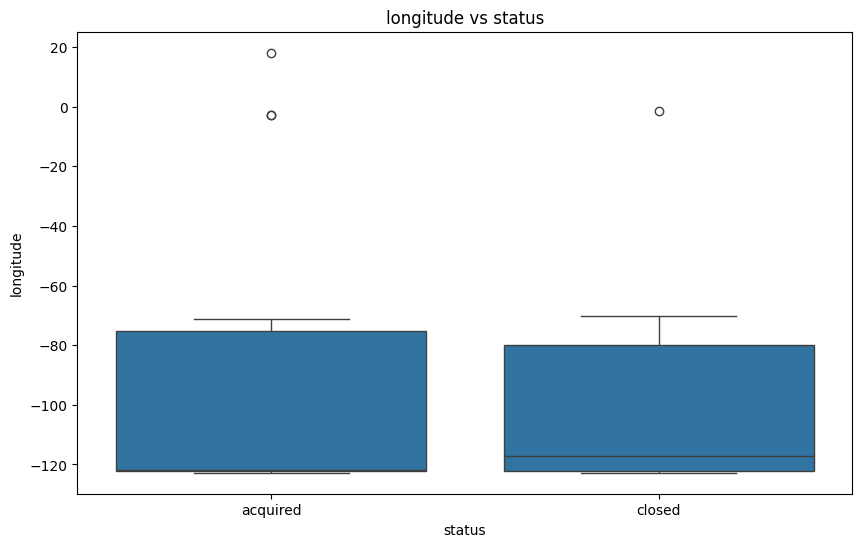

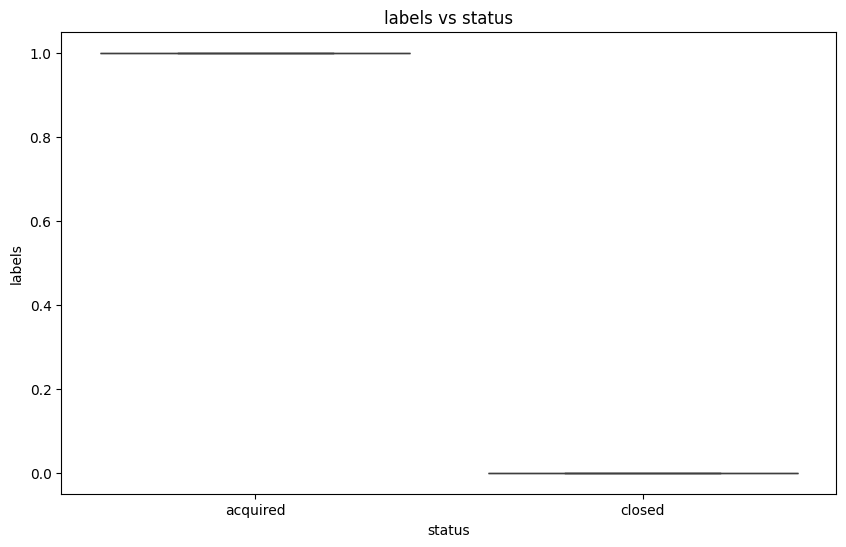

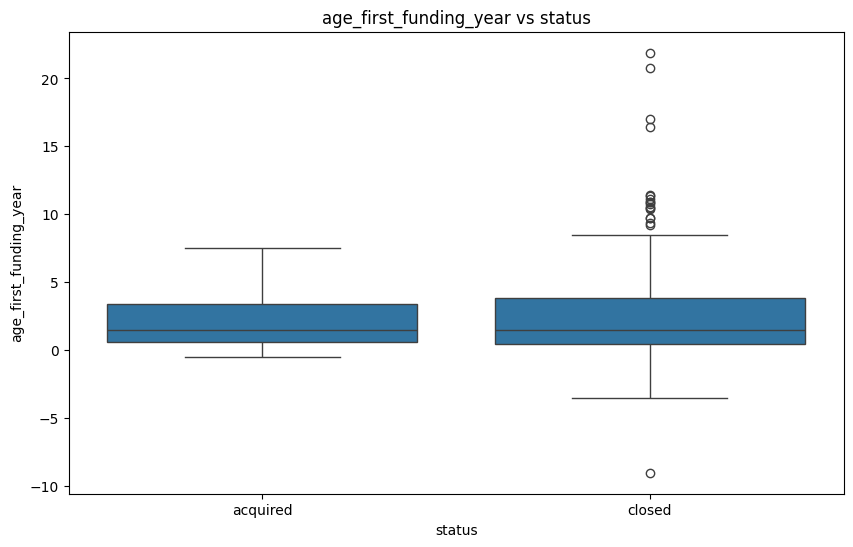

In [7]:
# 8. Análisis bivariado con la variable objetivo
for column in numeric_columns[:5]:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=TARGET_COLUMN, y=column, data=df)
    plt.title(f'{column} vs {TARGET_COLUMN}')
    plt.savefig(f'../reports/figures/eda/{column}_vs_target.png')
    plt.show()